# Skip-Gram Implementation

In [28]:
# import necessary libraries
import numpy as np
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [29]:
# Step 1: Load the text corpus
sentences = []
with open('file.txt', 'r') as f:
    for line in f:
        sentences.append(line.strip().split('.'))

# Step 2: Preprocess the text corpus
corpus=[]
# Iterate through the list of sentences, break them into lists of words and remove the empty strings
for i in range(len(sentences)):
    sentences[i] = sentences[i][0].split(' ')

    # strip the words of any special characters
    sentences[i] = [word.strip(',').strip('?').strip('!').lower() for word in sentences[i]]

    sentences[i] = list(filter(None, sentences[i]))
    if(len(sentences[i])>0):
        corpus.append(sentences[i])

print(corpus)


[['climate', 'change', 'is', 'one', 'of', 'the', 'most', 'pressing', 'issues', 'facing', 'humanity', 'today'], ['at', 'the', 'heart', 'of', 'climate', 'change', 'are', 'the', 'emissions', 'of', 'greenhouse', 'gases', 'primarily', 'carbon', 'dioxide', '(co2)', 'methane', '(ch4)', 'and', 'nitrous', 'oxide', '(n2o)'], ['the', 'most', 'evident', 'consequence', 'of', 'climate', 'change', 'is', 'the', 'increase', 'in', 'global', 'temperatures'], ['as', 'temperatures', 'rise', 'polar', 'ice', 'caps', 'and', 'glaciers', 'are', 'melting', 'at', 'an', 'alarming', 'rate'], ['climate', 'change', 'is', 'responsible', 'for', 'more', 'frequent', 'and', 'severe', 'weather', 'events'], ['increased', 'co2', 'levels', 'in', 'the', 'atmosphere', 'also', 'lead', 'to', 'higher', 'levels', 'of', 'carbonic', 'acid', 'in', 'the', 'oceans', 'causing', 'ocean', 'acidification'], ['food', 'is', 'an', 'integral', 'part', 'of', 'human', 'existence', 'sustaining', 'life', 'nourishing', 'our', 'bodies', 'and', 'delig

In [30]:
# Step 3: Build the vocabulary
vocab = []
for sentence in corpus:
    for word in sentence:
        if word not in vocab:
            vocab.append(word)

vocab_size = len(vocab)

# Step 4: Build the training data (skip-gram pairs)
# Build the training data by creating a list of tuples of the form (current_word, context_word)
context_size = 2
word_pairs = []
for sentence in corpus:
    for i in range(len(sentence)):
        for j in range(i-context_size, i+context_size+1):
            if j>=0 and j<len(sentence) and j!=i:
                word_pairs.append([sentence[i], sentence[j]])

print(word_pairs)

[['climate', 'change'], ['climate', 'is'], ['change', 'climate'], ['change', 'is'], ['change', 'one'], ['is', 'climate'], ['is', 'change'], ['is', 'one'], ['is', 'of'], ['one', 'change'], ['one', 'is'], ['one', 'of'], ['one', 'the'], ['of', 'is'], ['of', 'one'], ['of', 'the'], ['of', 'most'], ['the', 'one'], ['the', 'of'], ['the', 'most'], ['the', 'pressing'], ['most', 'of'], ['most', 'the'], ['most', 'pressing'], ['most', 'issues'], ['pressing', 'the'], ['pressing', 'most'], ['pressing', 'issues'], ['pressing', 'facing'], ['issues', 'most'], ['issues', 'pressing'], ['issues', 'facing'], ['issues', 'humanity'], ['facing', 'pressing'], ['facing', 'issues'], ['facing', 'humanity'], ['facing', 'today'], ['humanity', 'issues'], ['humanity', 'facing'], ['humanity', 'today'], ['today', 'facing'], ['today', 'humanity'], ['at', 'the'], ['at', 'heart'], ['the', 'at'], ['the', 'heart'], ['the', 'of'], ['heart', 'at'], ['heart', 'the'], ['heart', 'of'], ['heart', 'climate'], ['of', 'the'], ['of',

In [31]:
# Step 5: Build the skip-gram model architecture
# Define the hyperparameters
embed_size = 4
learning_rate = 0.001
epochs = 10

# Define the model architecture
class SkipGram(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super(SkipGram, self).__init__()  # Call the parent class constructor
        self.embeddings = nn.Embedding(vocab_size, embed_size)      # input -> hidden
        self.linear1 = nn.Linear(embed_size, vocab_size)            # hidden -> output

    def forward(self, x):
        embeds = self.embeddings(x)
        out = self.linear1(embeds)
        log_probs = nn.functional.log_softmax(out, dim=1)
        return log_probs
    
model = SkipGram(vocab_size, embed_size)


In [32]:
# Step 6: Train the model

# Define the loss function (cross entropy) and optimizer
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(epochs):
    total_loss = 0
    for context, target in word_pairs:
        context_var = Variable(torch.LongTensor([vocab.index(context)]))
        model.zero_grad()
        log_probs = model(context_var)
        loss = loss_function(log_probs, Variable(torch.LongTensor([vocab.index(target)])))
        loss.backward()
        optimizer.step()
        total_loss += loss.data
    print('Epoch:', epoch, 'Loss:', total_loss)

Epoch: 0 Loss: tensor(3000.5764)
Epoch: 1 Loss: tensor(2992.8838)
Epoch: 2 Loss: tensor(2985.2905)
Epoch: 3 Loss: tensor(2977.7998)
Epoch: 4 Loss: tensor(2970.4065)
Epoch: 5 Loss: tensor(2963.1133)
Epoch: 6 Loss: tensor(2955.9197)
Epoch: 7 Loss: tensor(2948.8257)
Epoch: 8 Loss: tensor(2941.8274)
Epoch: 9 Loss: tensor(2934.9307)


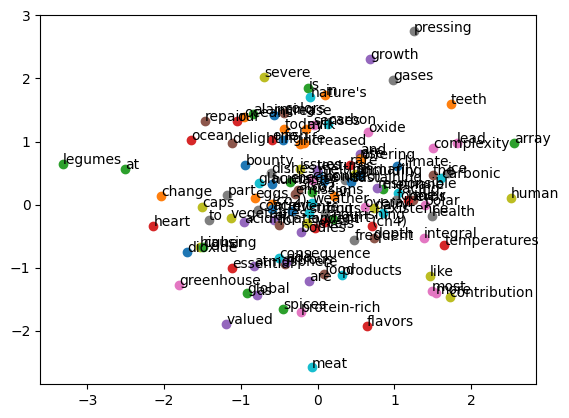

In [33]:
# Step 7: Visualize the embeddings
# Get the weights of the embeddings
embeddings = model.embeddings.weight.data.numpy()

# Plot the embeddings
fig, ax = plt.subplots()
for word in vocab:
    embedding = embeddings[vocab.index(word)]
    plt.scatter(embedding[0], embedding[1])
    ax.annotate(word, (embedding[0], embedding[1]))

plt.show()